# Лабораторная работа

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("houses_ads_popularity.csv")

Перед тем как проводить EDA, необходимо колонки типа object преобразовать в численные, чтобы посмотреть корреляцию признаков, поэтому первым этапом будет Feature engineering

# 1 Этап - Feature engineering

**Feature engineering** - необходимо заполнить пропуски в данных, обработать категориальные признаки и т.д.

In [3]:
df

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street,low
4,592,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34541,25582,1.0,1,14fdc4b01ae44b025f6c4d28c9097e5f,2016-06-16 02:12:57,Newly renovated bedroom apartment located off ...,29th St,['No pets'],40.7653,7166867,-73.9248,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7166867_625fde3...,1950,30-95 29th St,low
34542,50013,1.0,0,9b6cf886379a2511f8c633c84028efe7,2016-05-10 03:17:32,All apartments are newly renovated featuring: ...,E 1st St,"['Pre-War', 'Laundry in Unit', 'Dishwasher', '...",40.7239,6989251,-73.9901,5599e962719af3ccc2976855c2d5893c,['https://photos.renthop.com/2/6989251_42a4884...,2600,39 E 1st St,medium
34543,111475,2.0,2,0,2016-04-21 03:29:35,"<![CDATA[2 bedrooms, 5110, Astoria / Long Isla...",50th Avenue,[],40.7437,6905568,-73.9585,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/6905568_01602e3...,5110,2-01 50th Avenue,low
34544,71184,1.0,2,8754cae39f6e053974aa2337017eb3c1,2016-05-14 02:27:47,CooperCooper.com :: Listing ID #10_0385; 400 W...,400 West 56th Street,"['Laundry in Unit', 'Dishwasher', 'Cats Allowe...",40.7673,7010187,-73.9866,6e5c10246156ae5bdcd9b487ca99d96a,['https://photos.renthop.com/2/7010187_ab1db5d...,3400,400 West 56th Street,medium


Посмотрим какие колонки необходимо преобразовать

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34546 entries, 0 to 34545
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               34546 non-null  int64  
 1   bathrooms        34546 non-null  float64
 2   bedrooms         34546 non-null  int64  
 3   building_id      34546 non-null  object 
 4   created          34546 non-null  object 
 5   description      33509 non-null  object 
 6   display_address  34458 non-null  object 
 7   features         34546 non-null  object 
 8   latitude         34546 non-null  float64
 9   listing_id       34546 non-null  int64  
 10  longitude        34546 non-null  float64
 11  manager_id       34546 non-null  object 
 12  photos           34546 non-null  object 
 13  price            34546 non-null  int64  
 14  street_address   34542 non-null  object 
 15  TARGET           34546 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 4.2+ MB


Посмотрим в каких колонках есть пропуски данных

In [5]:
df.isna().sum()

Id                    0
bathrooms             0
bedrooms              0
building_id           0
created               0
description        1037
display_address      88
features              0
latitude              0
listing_id            0
longitude             0
manager_id            0
photos                0
price                 0
street_address        4
TARGET                0
dtype: int64

Посмотрим кол-во уникальных элементов в каждой колонке датафрейма

In [6]:
for x in df:
    print(x, df[x].unique().shape)

Id (34546,)
bathrooms (12,)
bedrooms (8,)
building_id (6378,)
created (34186,)
description (27758,)
display_address (6999,)
features (8245,)
latitude (2182,)
listing_id (34546,)
longitude (1566,)
manager_id (3134,)
photos (31992,)
price (2407,)
street_address (12399,)
TARGET (3,)


Колонки Id и listing_id удалим, так как колв-во уникальных элементов в них равно кол-ву элементов в датафрейме (не несут никакой информации)

In [7]:
df.drop(columns=["Id", 'listing_id'], inplace=True)

теперь рассмотрим по отдельности каждую колонку

# building_id

Видно, что в неоторых элементах датафрейма есть номер id, а внекоторых стоит 0 - отсутствие. Тогда можно заменить элементы с id на единицу

In [8]:
def build(x):
    if x != "0":
        x = '1'
    return int(x)

In [9]:
df.building_id = df.building_id.apply(lambda x: build(x))
df.building_id.head()

0    0
1    1
2    1
3    1
4    1
Name: building_id, dtype: int64

In [10]:
df.building_id.unique()

array([0, 1], dtype=int64)

# created

приведем колонку к типу datetime

In [11]:
df.created

0        2016-05-19 18:06:27
1        2016-06-16 02:01:49
2        2016-05-04 02:42:50
3        2016-05-12 05:57:56
4        2016-06-16 06:06:15
                ...         
34541    2016-06-16 02:12:57
34542    2016-05-10 03:17:32
34543    2016-04-21 03:29:35
34544    2016-05-14 02:27:47
34545    2016-04-05 03:35:52
Name: created, Length: 34546, dtype: object

In [12]:
df.created = df.created.apply(pd.to_datetime)
df.created

0       2016-05-19 18:06:27
1       2016-06-16 02:01:49
2       2016-05-04 02:42:50
3       2016-05-12 05:57:56
4       2016-06-16 06:06:15
                ...        
34541   2016-06-16 02:12:57
34542   2016-05-10 03:17:32
34543   2016-04-21 03:29:35
34544   2016-05-14 02:27:47
34545   2016-04-05 03:35:52
Name: created, Length: 34546, dtype: datetime64[ns]

разобьем колонку на 3 колонки: часы, дни и месяцы. Год уберем, так как у всех элементов 2016 год

In [13]:
df["day"] = df.created.dt.day
df["month"] = df.created.dt.month
df["hour"] = df.created.dt.hour

In [14]:
df.drop(columns='created', inplace = True)

кол-во уникальных часов

In [15]:
df.hour.unique().shape

(24,)

кол-во уникальных дней

In [16]:
df.day.unique().shape

(31,)

кол-во уникальных месяцев

In [17]:
df.month.unique().shape

(3,)

Проверим новые колонки на выбросы, колонку с месяцами проверять не будем, так как там и так всего лишь 3 уникальных элемента

Text(0.5, 1.0, 'Распределение по дням')

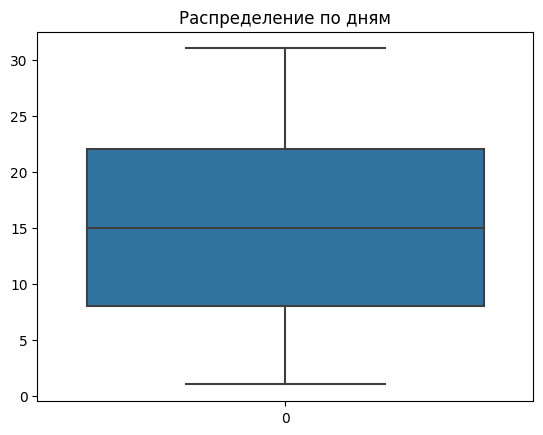

In [18]:
p = sns.boxplot(df.day)
p.set_title("Распределение по дням")

Text(0.5, 1.0, 'Распределение по часам')

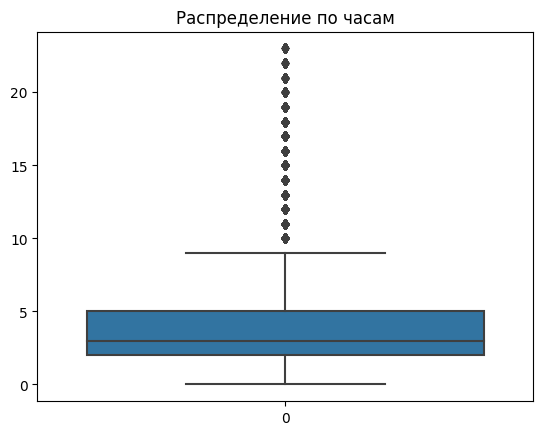

In [19]:
p = sns.boxplot(df.hour)
p.set_title("Распределение по часам")

количество элементов с выбросами в колонке hour

In [20]:
df[df.hour > 10].shape

(3816, 16)

Заменим элементы, выходящие за 95 перцентили на максимальный элементт из этого диапозона(95 перцентили)

In [21]:
df.hour = df.hour.clip(0, 10)

картина стала лучше

Text(0.5, 1.0, 'Распределение по часам')

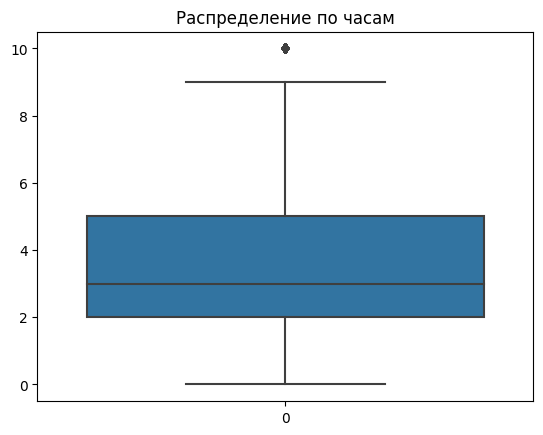

In [22]:
p = sns.boxplot(df.hour)
p.set_title("Распределение по часам")

# description

Есть пропуски, но так как признак бинарный, то разделять на тестовую и тренировочную выборку нет смысла

In [23]:
df.description.isna().sum()

1037

Попробуем закодировать следующим образом: если пропуск в колонке, то 0, иначе 1

In [24]:
def descr(x):
    if type(x) == str:
        return 1
    else:
        return 0

In [25]:
df.description = df.description.apply(lambda x: descr(x))
df.description.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: description, dtype: int64

In [26]:
df.description.unique()

array([1, 0], dtype=int64)

# display_address и street_address

все элементы в обоих колонках практически одинаковы, поэтому думаю, что колонку street_address можно убрать

In [27]:
er = pd.concat([df.street_address, df.display_address], axis=1)
er.head(20)

,street_address,display_address
0,W 50 & AVE 10,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...
1,55 River Drive South,55 River Drive South
2,22 W 77 Street,W 77 Street
3,100 John Street,John Street
4,321 West 16th Street,West 16th Street
5,224 W 13th St,W 13th St
6,520 East 11th Street,East 11th Street
7,680 E 224th,680 E 224th
8,334 East 94th Street,East 94th Street
9,2 Gold Street,Gold Street


In [28]:
df.drop(columns='street_address', inplace = True)

In [29]:
df.display_address.unique().shape

(6999,)

Так как есть пропуски, то разделим выборку на обучающую и тестовую и заполним в них пропуски самыми встречающимися элементами из тренировочной выборки, чтобы не было утечки данных

In [30]:
df.display_address.isna().sum()

88

In [31]:
df, target = df.drop(columns="TARGET"), df.TARGET

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3)

In [33]:
X_train.display_address.fillna(X_train.display_address.mode()[0], inplace = True)
X_test.display_address.fillna(X_train.display_address.mode()[0], inplace = True)

In [34]:
n = X_train.shape[0]

Обратно соберем наш датасет

In [35]:
y = pd.concat([y_train, y_test], axis=0)
df = pd.concat([X_train, X_test], axis=0)
df = pd.concat([df, y], axis=1)

Так как число уникальных элементов велико, то попробуем некоторые данные отнести к типу other, а потом закодировать при помощи OneHot

In [36]:
df.display_address.value_counts(sort=True)

Broadway                408
East 34th Street        248
Second Avenue           233
Wall Street             228
West 37th Street        203
                       ... 
3426 Steinway Street      1
150-01 24th ave           1
110 Macdougal St.         1
E 99th street             1
267 Edgecombe Avenue      1
Name: display_address, Length: 6998, dtype: int64

заполним массив cnt числами, равняющимся кол-ву встречаемости каждого элемента в колонке

In [37]:
a = df.display_address.unique()
b = np.array(df.display_address)
cnt = np.zeros(a.shape[0])
c = False

for x in b:
    for j, y in enumerate(a):
        if x==y:
            cnt[j] += 1
            c = True
        if c:
            c = False
            break

In [38]:
cnt2 = np.copy(cnt)
cnt.sort()
cnt

array([  1.,   1.,   1., ..., 233., 248., 408.])

Очень большое кол-во элементов, которые встречаются немного раз

(array([6.837e+03, 1.160e+02, 2.500e+01, 1.000e+01, 6.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1. ,  41.7,  82.4, 123.1, 163.8, 204.5, 245.2, 285.9, 326.6,
        367.3, 408. ]),
 <BarContainer object of 10 artists>)

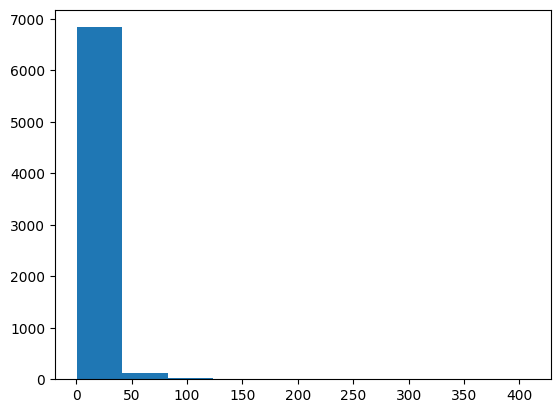

In [39]:
plt.hist(cnt)

Установим границу, ниже которой элементы будут относится к типу other

In [40]:
low = 35
mas = []
for i, x in enumerate(a):
    if cnt2[i] > low:
        mas.append(x)

In [41]:
def address_change(x, mas):
    if x in mas:
        return x
    else:
        x = "other"
        return x

In [42]:
df.display_address = df.display_address.apply(lambda x: address_change(x, mas))

In [43]:
df.display_address

12047               other
22457               other
26453               other
3867                other
1996                other
               ...       
8720                other
34279    West 26th Street
6536                other
21677               other
30177               other
Name: display_address, Length: 34546, dtype: object

In [44]:
df.display_address.unique().shape[0]

197

Потом одновременно с другими колонками (в которых необходимо) закодирую при помощи OneHot

# features

вместо списка запишем в ячейку длину списка

In [45]:
def length_mas(x):
    return len(x)

In [46]:
df.features = df.features.apply(lambda x: length_mas(x))
df.features.head()

12047    112
22457    106
26453    114
3867      49
1996     121
Name: features, dtype: int64

Проверим выбросы

Text(0.5, 1.0, 'Распределение по features')

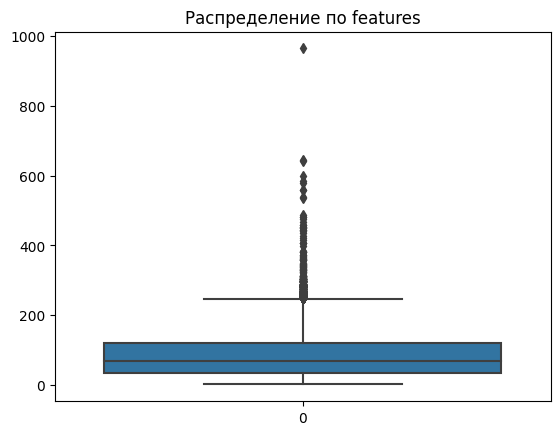

In [47]:
p = sns.boxplot(df.features)
p.set_title("Распределение по features")

кол-во выбросов в колонке features

In [48]:
df[df.features > 250].shape

(433, 15)

In [49]:
df.features = df.features.clip(0, 250)

Картина улучшилась

Text(0.5, 1.0, 'Распределение по features')

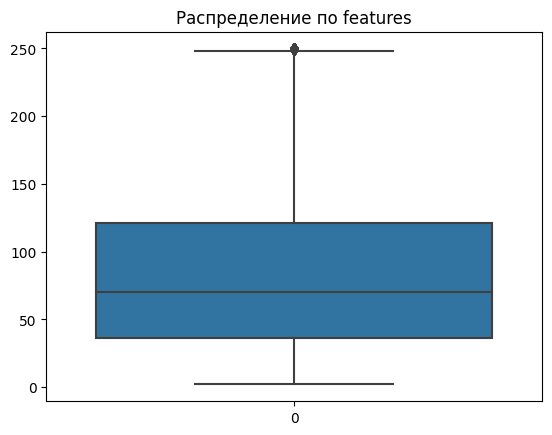

In [50]:
p = sns.boxplot(df.features)
p.set_title("Распределение по features")

# manager_id

Так как число уникальных элементов велико, то попробуем некоторые данные отнести к типу other, а потом закодировать при помощи OneHot

In [51]:
df.manager_id.unique().shape

(3134,)

отсортируем элементы в колонке по частоте встречаемочти

In [52]:
df.manager_id.value_counts(sort=True)

e6472c7237327dd3903b3d6f6a94515a    1820
6e5c10246156ae5bdcd9b487ca99d96a     513
62b685cc0d876c3a1a51d63a0d6a8082     292
8f5a9c893f6d602f4953fcc0b8e6e9b4     282
cb87dadbca78fad02b388dc9e8f25a5b     253
                                    ... 
86a2a178245dde6585aed05b1b2376c4       1
02b8c740c4cc957f21c8ce0fd4a27cc5       1
574d57e6f96278655d8a5d967aba08ef       1
28f5cb43c4080f10bf30ca9e09e23608       1
2b5e00e514d592161a5366730b8cde40       1
Name: manager_id, Length: 3134, dtype: int64

заполним массив cnt числами, равняющимся кол-ву встречаемости каждого элемента в колонке

In [53]:
a = df.manager_id.unique()
b = np.array(df.manager_id)
cnt = np.zeros(a.shape[0])
c = False

for x in b:
    for j, y in enumerate(a):
        if x==y:
            cnt[j] += 1
            c = True
        if c:
            c = False
            break

In [54]:
cnt2 = np.copy(cnt)
cnt.sort()
cnt

array([1.00e+00, 1.00e+00, 1.00e+00, ..., 2.92e+02, 5.13e+02, 1.82e+03])

Смотрим на кол-во самых часто встречаемых элементов и определяем границу, ниже которой элементы будут относится к типу other

In [55]:
cnt[3000:]

array([  47.,   47.,   47.,   47.,   47.,   47.,   48.,   48.,   49.,
         49.,   49.,   49.,   50.,   50.,   50.,   50.,   50.,   50.,
         51.,   51.,   51.,   51.,   51.,   52.,   52.,   52.,   53.,
         53.,   53.,   53.,   54.,   54.,   54.,   55.,   55.,   55.,
         55.,   56.,   56.,   56.,   57.,   57.,   58.,   58.,   58.,
         59.,   60.,   60.,   61.,   61.,   61.,   62.,   62.,   63.,
         63.,   63.,   63.,   63.,   64.,   65.,   66.,   66.,   66.,
         67.,   68.,   68.,   68.,   69.,   69.,   69.,   70.,   70.,
         70.,   72.,   72.,   72.,   73.,   73.,   74.,   75.,   75.,
         75.,   76.,   79.,   80.,   80.,   81.,   81.,   83.,   84.,
         86.,   89.,   90.,   92.,   96.,   97.,  100.,  100.,  103.,
        105.,  106.,  107.,  108.,  113.,  114.,  114.,  116.,  119.,
        121.,  124.,  125.,  131.,  134.,  134.,  137.,  147.,  150.,
        151.,  154.,  169.,  171.,  176.,  190.,  198.,  211.,  212.,
        220.,  226.,

(array([3.122e+03, 1.000e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.8290e+02, 3.6480e+02, 5.4670e+02, 7.2860e+02,
        9.1050e+02, 1.0924e+03, 1.2743e+03, 1.4562e+03, 1.6381e+03,
        1.8200e+03]),
 <BarContainer object of 10 artists>)

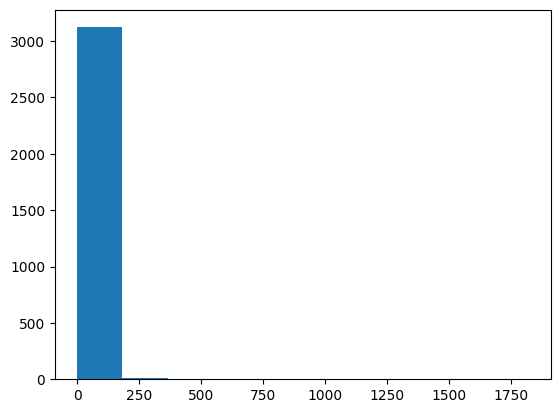

In [56]:
plt.hist(cnt)

In [57]:
low = 50
mas = []
for i, x in enumerate(a):
    if cnt2[i] > low:
        mas.append(x)

In [58]:
def manager_change(x, mas):
    if x in mas:
        return x
    else:
        x = "other"
        return x

In [59]:
df.manager_id = df.manager_id.apply(lambda x: manager_change(x, mas))

In [60]:
df.manager_id

12047                               other
22457    964dc31a872efa33fee9af11f62e843c
26453                               other
3867     62b685cc0d876c3a1a51d63a0d6a8082
1996     0a6ba20b892ed61df751420934d1ab51
                       ...               
8720                                other
34279                               other
6536                                other
21677                               other
30177                               other
Name: manager_id, Length: 34546, dtype: object

кол-во уникальных элементов сильно уменьшилось

In [61]:
df.manager_id.unique().shape

(117,)

Потом закодируем колонку при помощи OneHot

# photos

В колонке photos элементами являются списки с определенным количеством элементов(фото)

In [62]:
df.loc[1, 'photos']

"['https://photos.renthop.com/2/7166774_03cf63af09277defaba579d94b391d97.jpg', 'https://photos.renthop.com/2/7166774_d7305e007b460ac162e2389fac6d3dab.jpg', 'https://photos.renthop.com/2/7166774_e43e2f7c0f27faee1f2ab588a79c0c44.jpg', 'https://photos.renthop.com/2/7166774_a8ebf3938ba0a242d0ab563b549445b1.jpg', 'https://photos.renthop.com/2/7166774_5a1bc87d5d67e0e8672333ec0fd37fd1.jpg', 'https://photos.renthop.com/2/7166774_a9edf5b290f72b241a2b6d814a89aa36.jpg', 'https://photos.renthop.com/2/7166774_dbaab3f6d5011861c534c022a0ef031d.jpg', 'https://photos.renthop.com/2/7166774_80cd06ecf80402dd577f6023af2903aa.jpg', 'https://photos.renthop.com/2/7166774_7a755c67cbf5046acab44160960e4ee3.jpg', 'https://photos.renthop.com/2/7166774_0cce36984ebc5ed041feef8cbf81f6c1.jpg', 'https://photos.renthop.com/2/7166774_7004c64c3de59ad0bcb06f8719ac9971.jpg', 'https://photos.renthop.com/2/7166774_018e2030ba05d92192fe37b890aeff05.jpg', 'https://photos.renthop.com/2/7166774_860e0960ec115c075e36a6da869586b5.jpg

заменим список на его длину

In [63]:
def chan_len(x):
    return len(x)

In [64]:
df.photos = df.photos.apply(lambda x: chan_len(x))
df.photos

12047     462
22457     308
26453     539
3867        2
1996     1155
         ... 
8720      924
34279       2
6536      462
21677     308
30177     231
Name: photos, Length: 34546, dtype: int64

Text(0.5, 1.0, 'Распределение кол-ва фото')

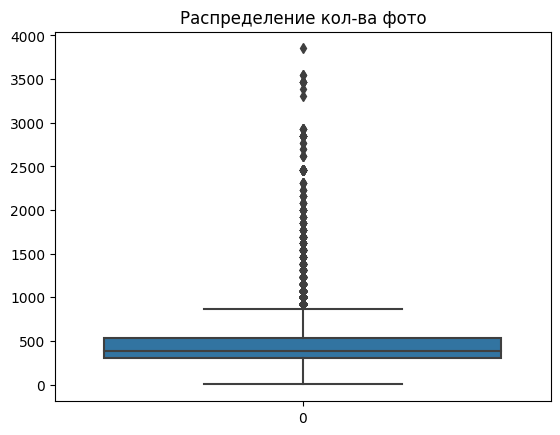

In [65]:
p = sns.boxplot(df.photos)
p.set_title("Распределение кол-ва фото")

Посмотрим кол-во выбросов, и заменим их на максимальных элемент из 95 перцентили

In [66]:
df[df.photos > 950].shape

(1135, 15)

In [67]:
df.photos = df.photos.clip(0, 950)

Выбросов стало меньше

Text(0.5, 1.0, 'Распределение кол-ва фото')

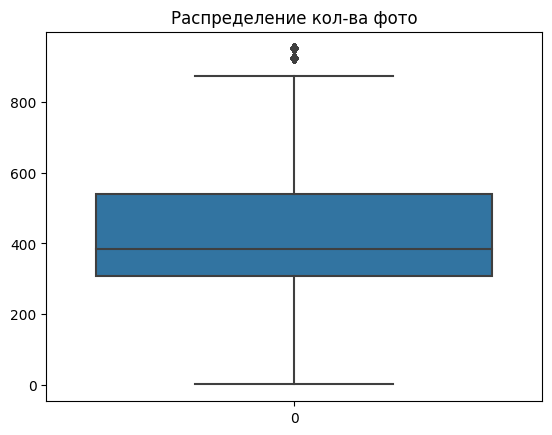

In [68]:
p = sns.boxplot(df.photos)
p.set_title("Распределение кол-ва фото")

# TARGET

Таргет при помощи onehot не получится, так как должна быть одна колонка, но так как это категориальный порядковый признак, то можно применить порядковое кодирование. low=1, medium=2, high=3

In [69]:
def tar(x):
    if x == "low":
        return 1
    elif x == "medium":
        return 2
    else:
        return 3

In [70]:
df.TARGET = df.TARGET.apply(lambda x: tar(x))
df.head()

,bathrooms,bedrooms,building_id,description,display_address,features,latitude,longitude,manager_id,photos,price,day,month,hour,TARGET
12047,2.0,2,1,1,other,112,40.7237,-73.9898,other,462,4095,20,5,4,1
22457,4.0,4,1,1,other,106,40.7759,-73.9638,964dc31a872efa33fee9af11f62e843c,308,20000,10,5,2,1
26453,2.0,2,1,1,other,114,40.7821,-73.9795,other,539,5000,4,6,5,3
3867,1.0,0,1,0,other,49,40.7654,-73.9816,62b685cc0d876c3a1a51d63a0d6a8082,2,2750,28,4,1,1
1996,1.0,1,1,1,other,121,40.7594,-73.9712,0a6ba20b892ed61df751420934d1ab51,950,3575,13,5,6,1


Уберем повторы в данных

In [71]:
df.shape

(34546, 15)

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
df.shape

(34483, 15)

# Выполним OneHot кодирование

In [74]:
df

,bathrooms,bedrooms,building_id,description,display_address,features,latitude,longitude,manager_id,photos,price,day,month,hour,TARGET
12047,2.0,2,1,1,other,112,40.7237,-73.9898,other,462,4095,20,5,4,1
22457,4.0,4,1,1,other,106,40.7759,-73.9638,964dc31a872efa33fee9af11f62e843c,308,20000,10,5,2,1
26453,2.0,2,1,1,other,114,40.7821,-73.9795,other,539,5000,4,6,5,3
3867,1.0,0,1,0,other,49,40.7654,-73.9816,62b685cc0d876c3a1a51d63a0d6a8082,2,2750,28,4,1,1
1996,1.0,1,1,1,other,121,40.7594,-73.9712,0a6ba20b892ed61df751420934d1ab51,950,3575,13,5,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8720,1.0,3,1,1,other,133,40.7416,-74.0025,other,924,5995,11,6,3,2
34279,2.0,2,0,1,West 26th Street,106,40.7448,-73.9919,other,2,6395,30,4,4,1
6536,1.0,3,1,1,other,94,40.7304,-74.0050,other,462,5295,18,4,2,1
21677,2.0,2,1,1,other,16,40.7439,-73.9743,other,308,5500,3,6,4,1


In [75]:
col = ["display_address", "manager_id"]
df = pd.get_dummies(df, col)

In [76]:
df.head()

,bathrooms,bedrooms,building_id,description,features,latitude,longitude,photos,price,day,...,manager_id_e0f4c69279ce5ae6421b39d46303554b,manager_id_e6472c7237327dd3903b3d6f6a94515a,manager_id_e90f2ded843cdb2efd65ef47d9fc8029,manager_id_eb5a6c4c2eb6f3e2a085c477afd5a815,manager_id_efd6fb6d537509ab0fc98661e76d19b2,manager_id_f9221aa0f03037660762dc6fa397bda3,manager_id_fc81b75568d3655a922523cb0d77ea5b,manager_id_fd960446d2a41002d3b36f25740157ca,manager_id_ffd7307e4924587b30ec014a95db1362,manager_id_other
12047,2.0,2,1,1,112,40.7237,-73.9898,462,4095,20,...,0,0,0,0,0,0,0,0,0,1
22457,4.0,4,1,1,106,40.7759,-73.9638,308,20000,10,...,0,0,0,0,0,0,0,0,0,0
26453,2.0,2,1,1,114,40.7821,-73.9795,539,5000,4,...,0,0,0,0,0,0,0,0,0,1
3867,1.0,0,1,0,49,40.7654,-73.9816,2,2750,28,...,0,0,0,0,0,0,0,0,0,0
1996,1.0,1,1,1,121,40.7594,-73.9712,950,3575,13,...,0,0,0,0,0,0,0,0,0,0


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34483 entries, 12047 to 30177
Columns: 327 entries, bathrooms to manager_id_other
dtypes: float64(3), int64(10), uint8(314)
memory usage: 14.0 MB


#  2 Этап - EDA

**EDA** - необходимо исследовать данные в предлагаемом Вам датасете. К исследованию данных относится анализ распределения значений в признаках, проверка скоррелированности признаков и т.д.

проанализируем распределение признаков к которым не было применено onehot кодирование 

In [78]:
col = ['bathrooms', 'bedrooms', 'building_id', 'description', 'features', 'latitude', 'longitude', 'photos', 'price', 'hour', 'day', 'month', 'TARGET']

In [79]:
data = df[col]

**bathrooms** - С увеличением кол-ва спален уменьшается и их количество

**bedrooms** - Тут в основном преобладают 2-3 спальни, 4-6 спален большая редкость

**building_id** - Довольно немного элементов без id дома

**description** - Почти все дома имеют описание

**features** - При увеличении количества признаков, количество таких домов уменьшается

**latitude and longitude** - очень маленькая дисперсия

**photos** - напоминает нормальное распределение

**day** - все дни имеют почти одинаковое количество, не информативный признак

**month** - Та же ситуация, что и с day

array([[<AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'building_id'}>,
        <AxesSubplot: title={'center': 'description'}>],
       [<AxesSubplot: title={'center': 'features'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'photos'}>],
       [<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'hour'}>,
        <AxesSubplot: title={'center': 'day'}>,
        <AxesSubplot: title={'center': 'month'}>],
       [<AxesSubplot: title={'center': 'TARGET'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

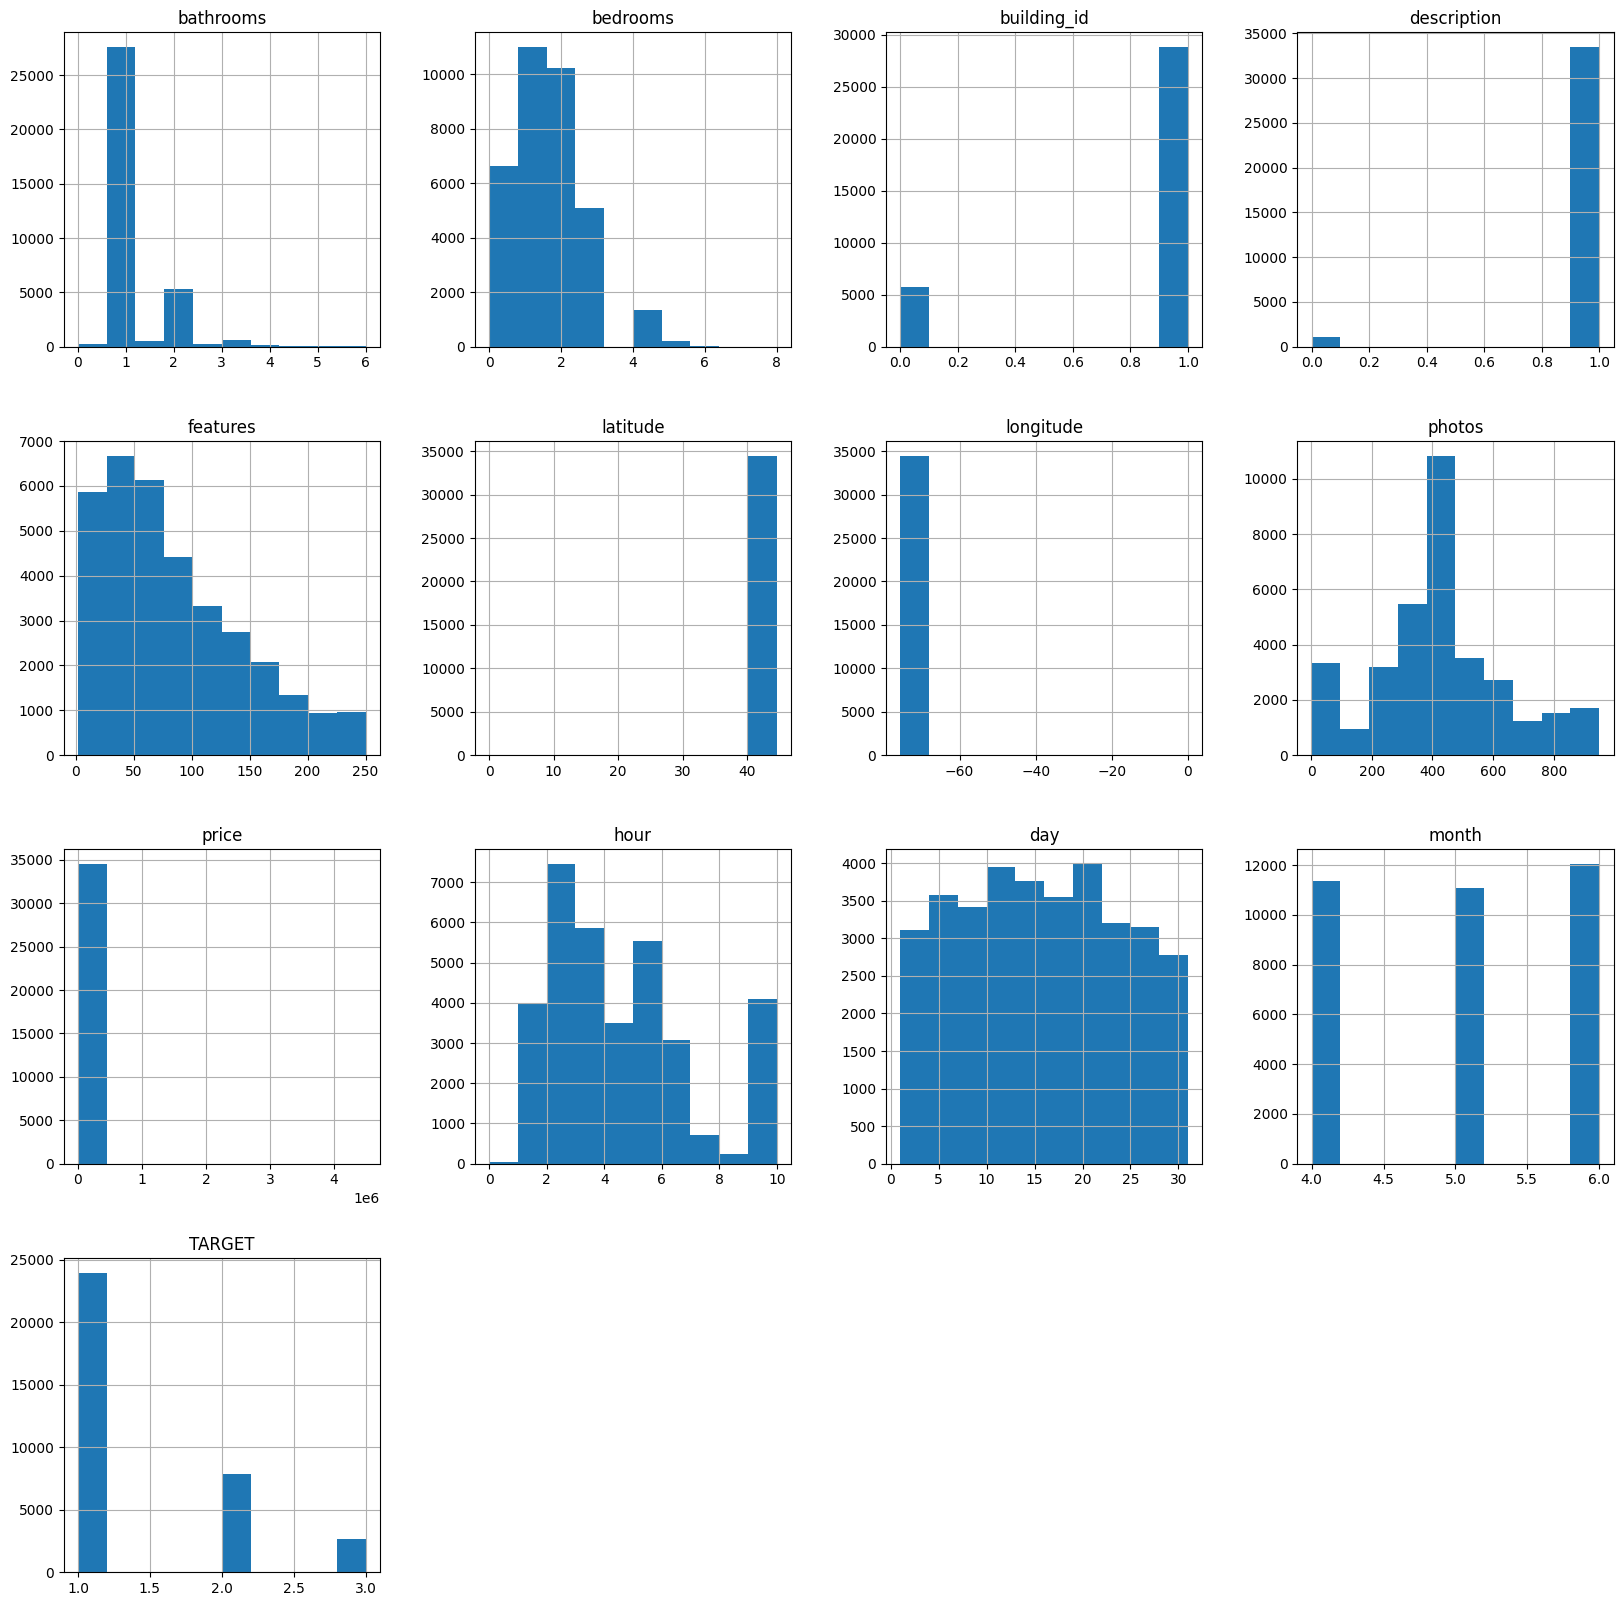

In [80]:
data.hist(figsize=(20, 20))

Посмотрим на корреляцию между признаками

In [81]:
corr = data.corr()
corr

,bathrooms,bedrooms,building_id,description,features,latitude,longitude,photos,price,hour,day,month,TARGET
bathrooms,1.000000,0.535116,0.050626,0.019435,0.230761,-0.018781,0.020195,0.164187,0.056033,-0.002101,0.010970,-0.001391,-0.086877
bedrooms,0.535116,1.000000,0.042677,0.037600,0.136156,-0.007710,0.009320,0.184802,0.043642,0.052801,0.005918,0.012156,0.026531
building_id,0.050626,0.042677,1.000000,0.006967,0.172062,-0.005645,-0.000107,0.111416,0.008710,0.186529,-0.013324,0.030132,0.193819
description,0.019435,0.037600,0.006967,1.000000,0.060138,-0.004279,0.003014,0.288599,-0.035040,0.074166,-0.027704,0.001261,0.074858
features,0.230761,0.136156,0.172062,0.060138,1.000000,-0.001098,-0.007587,0.227897,0.018292,0.054419,-0.006681,-0.011320,0.037769
latitude,-0.018781,-0.007710,-0.005645,-0.004279,-0.001098,1.000000,-0.993277,-0.008948,-0.001085,-0.032194,-0.002668,0.003883,0.003796
longitude,0.020195,0.009320,-0.000107,0.003014,-0.007587,-0.993277,1.000000,0.006441,0.000382,0.025015,0.004183,-0.002396,-0.004705
photos,0.164187,0.184802,0.111416,0.288599,0.227897,-0.008948,0.006441,1.000000,-0.001784,0.102662,-0.001287,0.007157,0.056641
price,0.056033,0.043642,0.008710,-0.035040,0.018292,-0.001085,0.000382,-0.001784,1.000000,-0.000852,0.007852,0.007899,-0.021745
hour,-0.002101,0.052801,0.186529,0.074166,0.054419,-0.032194,0.025015,0.102662,-0.000852,1.000000,-0.008316,0.100739,0.184746


<AxesSubplot: >

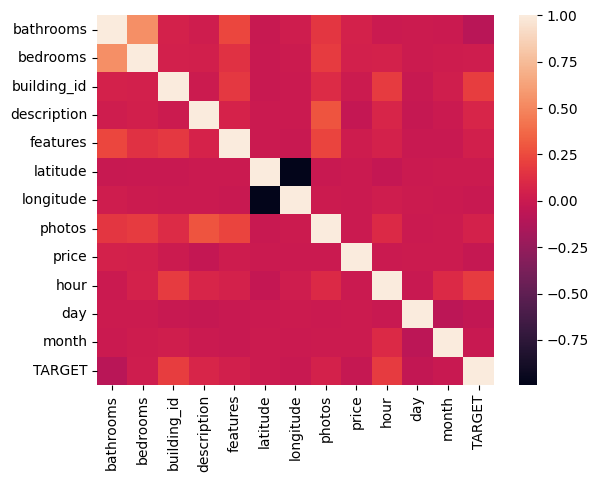

In [82]:
sns.heatmap(corr)

Колонки latitude и longitude коррелируют только между собой. Колонки day и month ни с кем не коррелируют, поэтому данные 4 колонки удалим из датасета

In [83]:
df.drop(columns=['latitude', 'longitude', 'day', 'month'], inplace=True)

Сильной скоррелированности среди признаков не наблюдается. Таргет немного коррелирует с hour и building_id, посмотрим на их распределение

Видно, что при отсутсвии id здания можно почти с уверенностью сказать, что это метка 1

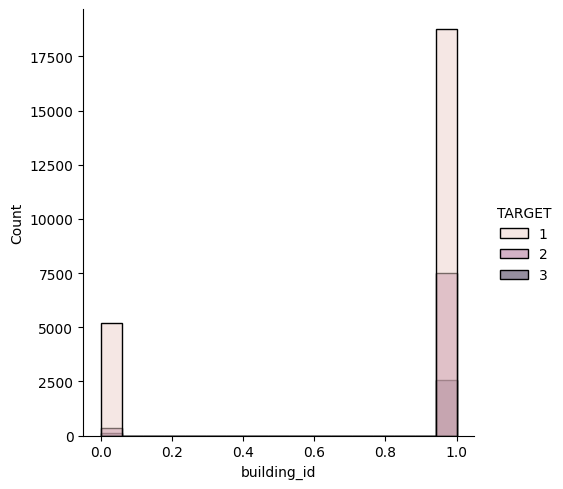

In [84]:
sns.displot(data=df, x="building_id", hue="TARGET")

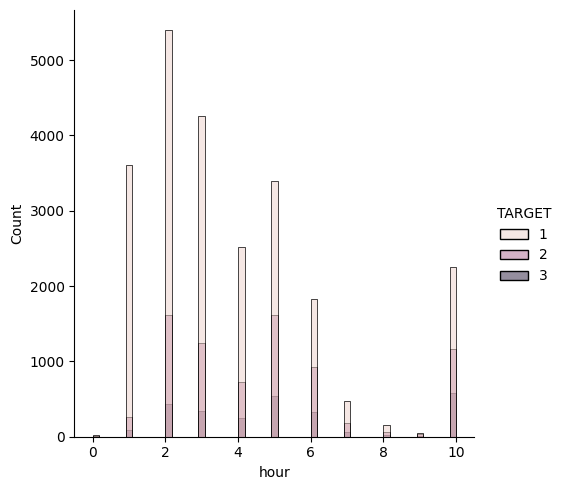

In [85]:
sns.displot(data=df, x="hour", hue="TARGET")

Давайте посмотрим на признаки, которые неплохо скоррелированы и как в них распределен таргет

Text(0.5, 1.0, 'Зависисмость кол-ва ванн от кол-ва спален')

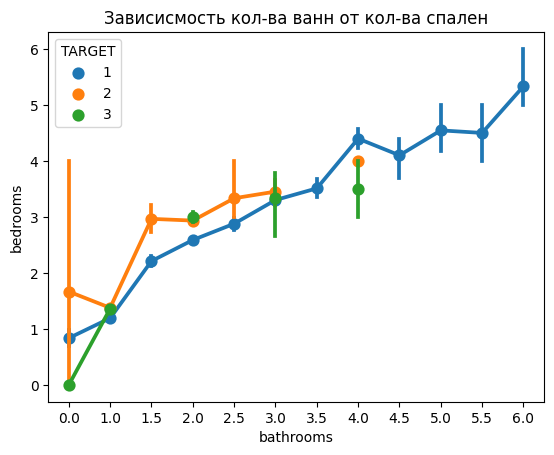

In [86]:
p = sns.pointplot(data=df, x="bathrooms", y ="bedrooms", hue="TARGET")
p.set_title("Зависисмость кол-ва ванн от кол-ва спален")

Таргет с разной меткой класса пропорционально увеличивается с увеличением кол-ва ванн и спален

Text(0.5, 1.0, 'Зависисмость кол-ва признаков от кол-ва ванн')

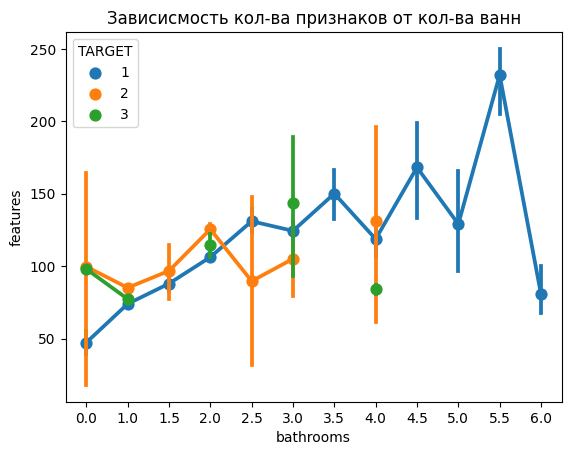

In [87]:
p = sns.pointplot(data=df, x="bathrooms", y ="features", hue="TARGET")
p.set_title("Зависисмость кол-ва признаков от кол-ва ванн")

Text(0.5, 1.0, 'Зависисмость кол-ва фото от наличия описания')

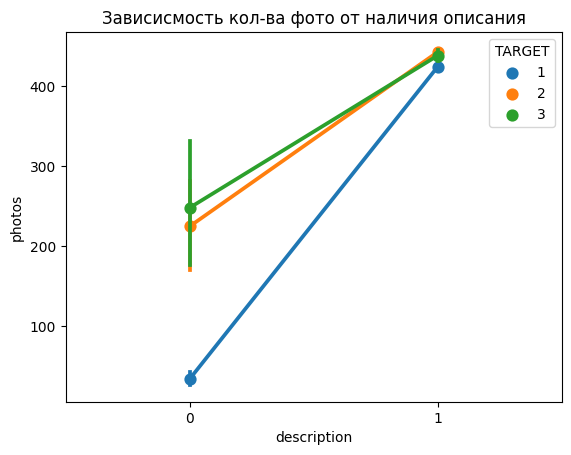

In [88]:
p = sns.pointplot(data=df, x="description", y ="photos", hue="TARGET")
p.set_title("Зависисмость кол-ва фото от наличия описания")

Наличие описания сильно влияет на таргет, особенно метку 1(low)

# 3 Этап - выбор целевой метрики

**Выбор целевой метрики** - необходимо выбрать метрику качества, которую вы будете оптимизировать. Для выбранной метрики необходимо написать пояснение. В этом задании нет единственного правильного ответа, однако за откровенно неадекватный выбор или слабую аргументацию будут снижаться баллы.

In [89]:
df.TARGET.value_counts(sort=True)

1    23947
2     7853
3     2683
Name: TARGET, dtype: int64

Видно, что метки классов плохо сбалансированны, поэтому accuracy точно не подойдет, так как высокая точность может быть обеспечена за счет члена TN, например, если модель будет предсказывать только метки 1(они у нас и преобладают), хотя более важен TP. *accuracy* = $\frac {TP+TN}{TP+TN+FP+FN}$. Можно оптимизировать precision - доля верно предсказанных классов ко всем положительно отнесенным классам или recall - доля правильно найденных положительных классов, среди всех положительных, либо F1-меру, так как она является гибридом precission и recall

Аргумент average в F1 возьмем macro и average, так как в нашем случае классы не сбалансированы(сильно преобладает метка 1) и если модель будет давать низкий f1-macro(средння f1 для всех меток), то это будет говорить о том, что модель дает выоский F1 для метки 1 и низкий для меток 2 и 3. Ткаже будем ориентироваться на average - средневзвешенная оценка, чтобы ориентироваться на долю правильно предсказанных меток.

Ответ: F1-мера

# 4 Этап - Проведение экспериментов

**Проведение экспериментов** - необходимо попробовать разные модели, изученные в рамках курса и оптимизировать ими выбранную вами целевую метрику. Решение, состоящее **только** из grid-search по гиперпараметрам Catboost, получает 0 баллов.

Восстановим тренировочную и тестовую выборку

In [90]:
X = df.drop(columns='TARGET')
y = df.TARGET
X_train = X[:n]
X_test = X[n:]
y_train = y[:n]
y_test = y[n:]

C:\Users\sav4u\AppData\Local\Temp\ipykernel_6580\792461484.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y[:n]
C:\Users\sav4u\AppData\Local\Temp\ipykernel_6580\792461484.py:6: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y[n:]


Проверим качество модели на бейзлайне и catboost

In [91]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score as f1

Будем выводить classification_report, чтобы кроме F1 меры на macro и weighted еще ориентироваться на качество каждой метки класса

In [92]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)
print(classification_report(y_pred, y_test, labels=[1,2,3]))

              precision    recall  f1-score   support

           1       1.00      0.69      0.82     10301
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.69     10301
   macro avg       0.33      0.23      0.27     10301
weighted avg       1.00      0.69      0.82     10301



C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [93]:
from catboost import CatBoostClassifier

catboosting = CatBoostClassifier()
catboosting.fit(X_train, y_train)
y_pred = catboosting.predict(X_test)

print(classification_report(y_test, y_pred, labels=[1,2,3]))

Learning rate set to 0.093085
0:	learn: 1.0308007	total: 179ms	remaining: 2m 59s
1:	learn: 0.9798396	total: 199ms	remaining: 1m 39s
2:	learn: 0.9364580	total: 224ms	remaining: 1m 14s
3:	learn: 0.9017275	total: 245ms	remaining: 1m 1s
4:	learn: 0.8708983	total: 264ms	remaining: 52.6s
5:	learn: 0.8446459	total: 282ms	remaining: 46.8s
6:	learn: 0.8218355	total: 299ms	remaining: 42.4s
7:	learn: 0.8033454	total: 315ms	remaining: 39s
8:	learn: 0.7870259	total: 333ms	remaining: 36.7s
9:	learn: 0.7723708	total: 351ms	remaining: 34.8s
10:	learn: 0.7594743	total: 369ms	remaining: 33.2s
11:	learn: 0.7485911	total: 387ms	remaining: 31.8s
12:	learn: 0.7386308	total: 405ms	remaining: 30.7s
13:	learn: 0.7300075	total: 425ms	remaining: 29.9s
14:	learn: 0.7211895	total: 444ms	remaining: 29.1s
15:	learn: 0.7142852	total: 464ms	remaining: 28.5s
16:	learn: 0.7076615	total: 483ms	remaining: 28s
17:	learn: 0.7019163	total: 501ms	remaining: 27.3s
18:	learn: 0.6965164	total: 518ms	remaining: 26.7s
19:	learn: 0

170:	learn: 0.6061739	total: 2.77s	remaining: 13.5s
171:	learn: 0.6059783	total: 2.79s	remaining: 13.4s
172:	learn: 0.6058313	total: 2.8s	remaining: 13.4s
173:	learn: 0.6056858	total: 2.81s	remaining: 13.4s
174:	learn: 0.6054696	total: 2.83s	remaining: 13.3s
175:	learn: 0.6052689	total: 2.84s	remaining: 13.3s
176:	learn: 0.6051265	total: 2.86s	remaining: 13.3s
177:	learn: 0.6049662	total: 2.88s	remaining: 13.3s
178:	learn: 0.6048850	total: 2.9s	remaining: 13.3s
179:	learn: 0.6047371	total: 2.91s	remaining: 13.3s
180:	learn: 0.6045200	total: 2.93s	remaining: 13.2s
181:	learn: 0.6043606	total: 2.94s	remaining: 13.2s
182:	learn: 0.6042438	total: 2.95s	remaining: 13.2s
183:	learn: 0.6041004	total: 2.97s	remaining: 13.2s
184:	learn: 0.6039776	total: 2.98s	remaining: 13.2s
185:	learn: 0.6038903	total: 3s	remaining: 13.1s
186:	learn: 0.6037242	total: 3.02s	remaining: 13.1s
187:	learn: 0.6035953	total: 3.04s	remaining: 13.1s
188:	learn: 0.6034973	total: 3.06s	remaining: 13.1s
189:	learn: 0.603

330:	learn: 0.5874623	total: 5.09s	remaining: 10.3s
331:	learn: 0.5874224	total: 5.1s	remaining: 10.3s
332:	learn: 0.5873211	total: 5.12s	remaining: 10.2s
333:	learn: 0.5872578	total: 5.13s	remaining: 10.2s
334:	learn: 0.5870676	total: 5.14s	remaining: 10.2s
335:	learn: 0.5869835	total: 5.16s	remaining: 10.2s
336:	learn: 0.5869169	total: 5.17s	remaining: 10.2s
337:	learn: 0.5868086	total: 5.18s	remaining: 10.2s
338:	learn: 0.5867318	total: 5.2s	remaining: 10.1s
339:	learn: 0.5866653	total: 5.21s	remaining: 10.1s
340:	learn: 0.5865924	total: 5.23s	remaining: 10.1s
341:	learn: 0.5865094	total: 5.24s	remaining: 10.1s
342:	learn: 0.5864247	total: 5.26s	remaining: 10.1s
343:	learn: 0.5863403	total: 5.27s	remaining: 10.1s
344:	learn: 0.5861977	total: 5.29s	remaining: 10s
345:	learn: 0.5861258	total: 5.3s	remaining: 10s
346:	learn: 0.5860353	total: 5.32s	remaining: 10s
347:	learn: 0.5858503	total: 5.33s	remaining: 9.98s
348:	learn: 0.5857720	total: 5.34s	remaining: 9.96s
349:	learn: 0.5856998

503:	learn: 0.5734784	total: 7.35s	remaining: 7.24s
504:	learn: 0.5734020	total: 7.37s	remaining: 7.22s
505:	learn: 0.5733286	total: 7.38s	remaining: 7.21s
506:	learn: 0.5732611	total: 7.39s	remaining: 7.19s
507:	learn: 0.5732059	total: 7.41s	remaining: 7.17s
508:	learn: 0.5731585	total: 7.42s	remaining: 7.16s
509:	learn: 0.5730412	total: 7.43s	remaining: 7.14s
510:	learn: 0.5729840	total: 7.45s	remaining: 7.13s
511:	learn: 0.5729403	total: 7.46s	remaining: 7.11s
512:	learn: 0.5727978	total: 7.47s	remaining: 7.09s
513:	learn: 0.5727259	total: 7.48s	remaining: 7.08s
514:	learn: 0.5725982	total: 7.5s	remaining: 7.06s
515:	learn: 0.5725232	total: 7.51s	remaining: 7.04s
516:	learn: 0.5724543	total: 7.52s	remaining: 7.03s
517:	learn: 0.5724067	total: 7.53s	remaining: 7.01s
518:	learn: 0.5723263	total: 7.54s	remaining: 6.99s
519:	learn: 0.5722744	total: 7.56s	remaining: 6.98s
520:	learn: 0.5721997	total: 7.58s	remaining: 6.97s
521:	learn: 0.5720748	total: 7.59s	remaining: 6.95s
522:	learn: 0

676:	learn: 0.5607793	total: 9.72s	remaining: 4.64s
677:	learn: 0.5607423	total: 9.73s	remaining: 4.62s
678:	learn: 0.5606648	total: 9.75s	remaining: 4.61s
679:	learn: 0.5606283	total: 9.76s	remaining: 4.59s
680:	learn: 0.5605707	total: 9.78s	remaining: 4.58s
681:	learn: 0.5605201	total: 9.79s	remaining: 4.57s
682:	learn: 0.5604640	total: 9.8s	remaining: 4.55s
683:	learn: 0.5603893	total: 9.82s	remaining: 4.54s
684:	learn: 0.5602998	total: 9.83s	remaining: 4.52s
685:	learn: 0.5602609	total: 9.84s	remaining: 4.51s
686:	learn: 0.5602053	total: 9.86s	remaining: 4.49s
687:	learn: 0.5601521	total: 9.87s	remaining: 4.47s
688:	learn: 0.5600853	total: 9.88s	remaining: 4.46s
689:	learn: 0.5600515	total: 9.89s	remaining: 4.45s
690:	learn: 0.5599670	total: 9.91s	remaining: 4.43s
691:	learn: 0.5599168	total: 9.92s	remaining: 4.42s
692:	learn: 0.5598374	total: 9.93s	remaining: 4.4s
693:	learn: 0.5597768	total: 9.95s	remaining: 4.39s
694:	learn: 0.5597119	total: 9.96s	remaining: 4.37s
695:	learn: 0.

850:	learn: 0.5499189	total: 12s	remaining: 2.11s
851:	learn: 0.5498509	total: 12s	remaining: 2.09s
852:	learn: 0.5497755	total: 12.1s	remaining: 2.08s
853:	learn: 0.5496853	total: 12.1s	remaining: 2.06s
854:	learn: 0.5496191	total: 12.1s	remaining: 2.05s
855:	learn: 0.5495389	total: 12.1s	remaining: 2.04s
856:	learn: 0.5494931	total: 12.1s	remaining: 2.02s
857:	learn: 0.5494342	total: 12.1s	remaining: 2.01s
858:	learn: 0.5494105	total: 12.1s	remaining: 1.99s
859:	learn: 0.5492956	total: 12.2s	remaining: 1.98s
860:	learn: 0.5492573	total: 12.2s	remaining: 1.96s
861:	learn: 0.5491853	total: 12.2s	remaining: 1.95s
862:	learn: 0.5491140	total: 12.2s	remaining: 1.93s
863:	learn: 0.5490286	total: 12.2s	remaining: 1.92s
864:	learn: 0.5489867	total: 12.2s	remaining: 1.91s
865:	learn: 0.5489335	total: 12.2s	remaining: 1.89s
866:	learn: 0.5488840	total: 12.2s	remaining: 1.88s
867:	learn: 0.5487676	total: 12.3s	remaining: 1.86s
868:	learn: 0.5486797	total: 12.3s	remaining: 1.85s
869:	learn: 0.54

Теперь посмотрим качество модели на стандартных классификаторах

In [94]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(classification_report(y_pred, y_test, labels=[1,2,3]))

              precision    recall  f1-score   support

           1       0.89      0.73      0.80      8731
           2       0.19      0.34      0.24      1334
           3       0.11      0.38      0.17       236

    accuracy                           0.67     10301
   macro avg       0.40      0.48      0.41     10301
weighted avg       0.78      0.67      0.72     10301



In [95]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test, labels=[1,2,3]))

              precision    recall  f1-score   support

           1       0.80      0.79      0.80      7231
           2       0.34      0.36      0.35      2235
           3       0.29      0.28      0.29       835

    accuracy                           0.66     10301
   macro avg       0.48      0.48      0.48     10301
weighted avg       0.66      0.66      0.66     10301



SVM всем объектам присвоила метку 1

In [96]:
from sklearn import svm

In [97]:
model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_pred, y_test, labels=[1,2,3]))

              precision    recall  f1-score   support

           1       1.00      0.69      0.82     10301
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.69     10301
   macro avg       0.33      0.23      0.27     10301
weighted avg       1.00      0.69      0.82     10301



C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

у KNN и деревьев примерно одинаковая точность. Попробуем подобрать гиперпараметры для моделей

# KNN

In [107]:
f1_wei = []
f1_macro = []
for i in range(2, 11):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    f1_wei.append(f1(y_pred, y_test, average='weighted'))
    f1_macro.append(f1(y_pred, y_test, average='macro'))
print(f"Лучший f1_weighted = {max(f1_wei)} при {(np.array(f1_wei)).argmax()+2} кол-ве соседей")
print(f"Лучший f1_macro = {max(f1_macro)} при {(np.array(f1_macro)).argmax()+2} кол-ве соседей")

Лучший f1_weighted = 0.7502546478419991 при 10 кол-ве соседей
Лучший f1_macro = 0.41606604481142195 при 3 кол-ве соседей


<AxesSubplot: >

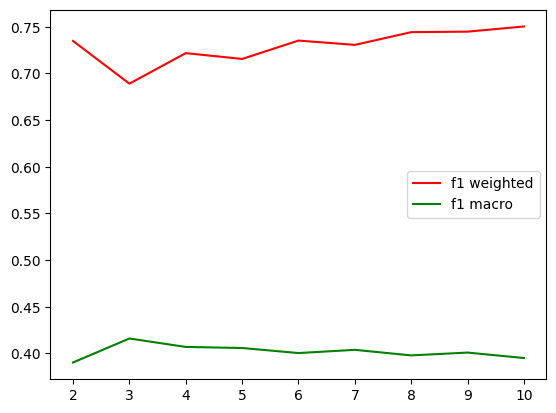

In [108]:
sns.lineplot(x=range(2,11), y=f1_wei, color='r', label="f1 weighted")
sns.lineplot(x=range(2,11), y=f1_macro, color='g', label="f1 macro")

По графикам можно определить, что оптимальное кол-во соседей равно 4-5, так как при большем кол-ве macro начинает падать

# tree

In [109]:
f1_wei = []
f1_macro = []
for i in range(3, 12):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_wei.append(f1(y_pred, y_test, average='weighted'))
    f1_macro.append(f1(y_pred, y_test, average='macro'))
print(f"Лучший f1_weighted = {max(f1_wei)} при {(np.array(f1_wei)).argmax()+2} кол-ве соседей")
print(f"Лучший f1_macro = {max(f1_macro)} при {(np.array(f1_macro)).argmax()+2} кол-ве соседей")

Лучший f1_weighted = 0.8061498418611973 при 2 кол-ве соседей
Лучший f1_macro = 0.4674286420132742 при 9 кол-ве соседей


<AxesSubplot: >

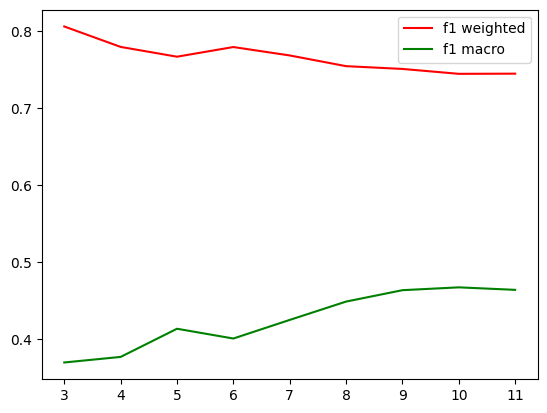

In [110]:
sns.lineplot(x=range(3, 12), y=f1_wei, color='r', label="f1 weighted")
sns.lineplot(x=range(3,12), y=f1_macro, color='g', label="f1 macro")

оптимальная глубина дерева равна 8-10

# SVM

будем выводить также classification_report, наблюдая за точность предсказания меток класса

In [103]:
c_list = [0.5, 1]
degree_list = [2, 3,4,5]

for i in c_list:
    for j in degree_list:
        model = svm.SVC(degree=j, C=i)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(classification_report(y_pred, y_test, labels=[1,2,3]))

C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

           1       1.00      0.69      0.82     10305
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.69     10305
   macro avg       0.33      0.23      0.27     10305
weighted avg       1.00      0.69      0.82     10305



C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

           1       1.00      0.69      0.82     10305
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.69     10305
   macro avg       0.33      0.23      0.27     10305
weighted avg       1.00      0.69      0.82     10305



C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

           1       1.00      0.69      0.82     10305
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.69     10305
   macro avg       0.33      0.23      0.27     10305
weighted avg       1.00      0.69      0.82     10305



C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

           1       1.00      0.69      0.82     10305
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.69     10305
   macro avg       0.33      0.23      0.27     10305
weighted avg       1.00      0.69      0.82     10305



C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

           1       1.00      0.69      0.82     10305
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.69     10305
   macro avg       0.33      0.23      0.27     10305
weighted avg       1.00      0.69      0.82     10305



C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

           1       1.00      0.69      0.82     10305
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.69     10305
   macro avg       0.33      0.23      0.27     10305
weighted avg       1.00      0.69      0.82     10305



C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

           1       1.00      0.69      0.82     10305
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.69     10305
   macro avg       0.33      0.23      0.27     10305
weighted avg       1.00      0.69      0.82     10305

              precision    recall  f1-score   support

           1       1.00      0.69      0.82     10305
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.69     10305
   macro avg       0.33      0.23      0.27     10305
weighted avg       1.00      0.69      0.82     10305



C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sav4u\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

почему то svm отказывается предсказывать метки 2 и 3

Теперь посмотрим на **ансамблиевые методы**

# RandomForest

In [111]:
from sklearn.ensemble import RandomForestClassifier

f1_wei = []
f1_macro = []
for i in range(5,55,5):
    clf = RandomForestClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_wei.append(f1(y_pred, y_test, average='weighted'))
    f1_macro.append(f1(y_pred, y_test, average='macro'))
print(f"Лучший f1_weighted = {max(f1_wei)} при глубине {(np.array(f1_wei)).argmax()*5 +5}")
print(f"Лучший f1_macro = {max(f1_macro)} при глубине {(np.array(f1_macro)).argmax()*5 +5}")

Лучший f1_weighted = 0.8198430429054246 при глубине 5
Лучший f1_macro = 0.49347704076817284 при глубине 50


<AxesSubplot: >

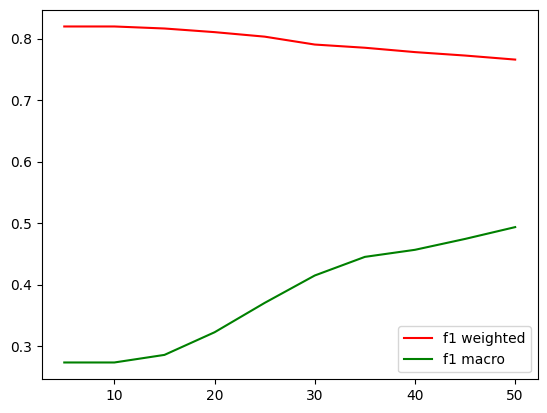

In [112]:
sns.lineplot(x=range(5,55,5), y=f1_wei, color='r', label="f1 weighted")
sns.lineplot(x=range(5,55,5), y=f1_macro, color='g', label="f1 macro")

Оптимальная глубина 40-45

Интересно, что у деревье и леса с увеличением macro падает weighted. Это связано с тем, что модель начала чаще предсказывать метки 2 и 3, и в некоторых случаях неверно

# Беггинг

Беггинг на knn показал неплохой результат

In [113]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=4), n_estimators=10, max_samples=0.7)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("average =",f1(y_pred, y_test, average='weighted'))
print("macro =",f1(y_pred, y_test, average='macro'))

average = 0.7130914388026498
macro = 0.42244670720313743


In [114]:
f1_wei = []
f1_macro = []
for n in range(4, 15, 2):
    clf = BaggingClassifier(KNeighborsClassifier(n_neighbors=4), n_estimators=10, max_samples=0.7)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_wei.append(f1(y_pred, y_test, average='weighted'))
    f1_macro.append(f1(y_pred, y_test, average='macro'))
print(f"Лучший f1_weighted = {max(f1_wei)} при глубине {(np.array(f1_wei)).argmax()*2 +2}")
print(f"Лучший f1_macro = {max(f1_macro)} при глубине {(np.array(f1_macro)).argmax()*2 +2}")

Лучший f1_weighted = 0.7147129019438324 при глубине 4
Лучший f1_macro = 0.4229775015243524 при глубине 8


<AxesSubplot: >

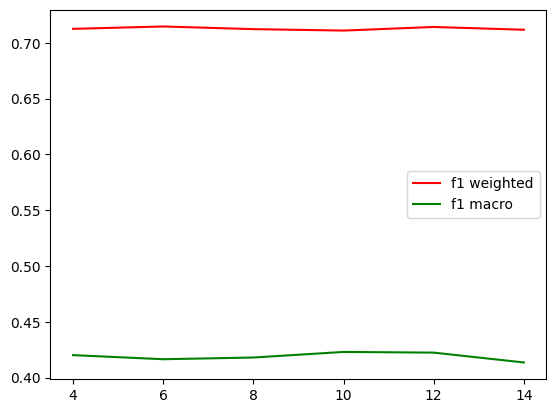

In [115]:
sns.lineplot(x=range(4, 15, 2), y=f1_wei, color='r', label="f1 weighted")
sns.lineplot(x=range(4, 15, 2), y=f1_macro, color='g', label="f1 macro")

Оптимальный n_estimators = 10

# Стекинг

базовые модели: knn, svm

метамодель: tree

In [116]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=4)), ('svm', svm.SVC())], final_estimator=tree.DecisionTreeClassifier(max_depth=10))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("average =",f1(y_pred, y_test, average='weighted'))
print("macro =",f1(y_pred, y_test, average='macro'))

average = 0.8146834518856156
macro = 0.2760180074687229


базовые модели: knn, tree

метамодель: svm

In [119]:
clf = StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=4)), ('tree', tree.DecisionTreeClassifier(max_depth=10))], final_estimator=svm.SVC())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("average =",f1(y_pred, y_test, average='weighted'))
print("macro =",f1(y_pred, y_test, average='macro'))

average = 0.7846887597117318
macro = 0.40063572684760995


Неплохой результат для данной комбинации моделей

базовые модели: tree, svm

метамодель: knn

In [118]:
clf = StackingClassifier(estimators=[('tree', tree.DecisionTreeClassifier(max_depth=10)), ('svm', svm.SVC())], final_estimator=KNeighborsClassifier(n_neighbors=4))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("average =",f1(y_pred, y_test, average='weighted'))
print("macro =",f1(y_pred, y_test, average='macro'))

average = 0.7469830017088379
macro = 0.397379264618404


Тоже хороший показатель

# Градиентный бустинг

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

In [122]:
boost = GradientBoostingClassifier()
boost.fit(X_train, y_train)
y_pred = boost.predict(X_test)
print("average =",f1(y_pred, y_test, average='weighted'))
print("macro =",f1(y_pred, y_test, average='macro'))

average = 0.7809869809686073
macro = 0.46339605293564906


Лучший результат показали градиентный бустинг и RandomForest

# Этап 5 - Анализ ошибок модели

**Анализ ошибок модели** - необходимо взять несколько примеров из тестовой части датасета, на которых модель дала неправильный ответ, и попытаться проанализировать их, найти закономерности, полученные выводы проверить на других примерах.

Создадим датафрейм с дополнительной колонкой true false, чтобы видеть где модель сделала верное предсказание, а где нет

In [123]:
error = pd.DataFrame(y_pred == y_test)
error.rename(columns={"TARGET":"Error"}, inplace=True)
error.head()

,Error
30236,True
30948,False
3935,True
1851,False
32705,True


Индексы сохранились как в исходном датафрейме df. Необходимо это исправить, чтобы склеить все колонки в один датасет. Если это не сделать то появяться как бы новые элементы с NaN, потому что в y_test, X_train индексация как в датафрейме df, а в y_pred индексация по порядку

In [124]:
y_test.head()

30236    1
30948    3
3935     2
1851     1
32705    1
Name: TARGET, dtype: int64

Изменим индексацию, чтобы индексы начинались с нуля и шли по порядку

In [125]:
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
error.reset_index(drop=True, inplace=True)

In [126]:
y_test.head()

0    1
1    3
2    2
3    1
4    1
Name: TARGET, dtype: int64

обернем массив предсказанных меток в датафрейм

In [129]:
pred = pd.DataFrame(y_pred)
pred.rename(columns={0:"Pred"}, inplace=True)
pred.head()

,Pred
0,1
1,1
2,2
3,2
4,1


Объединим датафреймы в один, чтобы потом можно было группировать признаки

In [130]:
test_error = pd.concat([X_test, error, y_test, pred], axis=1)
err = test_error[test_error.Error == False]
err

,bathrooms,bedrooms,building_id,description,features,photos,price,hour,display_address_10 Ave.,display_address_1st Ave.,...,manager_id_eb5a6c4c2eb6f3e2a085c477afd5a815,manager_id_efd6fb6d537509ab0fc98661e76d19b2,manager_id_f9221aa0f03037660762dc6fa397bda3,manager_id_fc81b75568d3655a922523cb0d77ea5b,manager_id_fd960446d2a41002d3b36f25740157ca,manager_id_ffd7307e4924587b30ec014a95db1362,manager_id_other,Error,TARGET,Pred
1,1.0,1,1,1,114,462,3392,10,0,0,...,0,0,0,0,0,0,1,False,3,1
3,1.0,2,1,1,87,308,2800,5,0,0,...,0,0,0,0,0,0,0,False,1,2
10,1.0,0,1,1,186,950,2525,3,0,0,...,0,0,0,0,0,0,1,False,3,1
15,1.0,1,1,1,36,231,1750,10,0,0,...,0,0,0,0,0,0,1,False,1,2
16,2.0,3,1,1,45,2,2350,10,0,0,...,0,0,0,0,0,0,1,False,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10286,2.0,4,1,1,188,770,6195,2,0,0,...,0,0,0,0,0,0,0,False,2,1
10291,1.0,1,1,1,107,770,1900,6,0,0,...,0,0,0,0,0,0,1,False,3,2
10292,1.0,0,1,1,51,231,1763,3,0,0,...,0,0,0,0,0,0,0,False,3,2
10295,1.0,2,1,1,43,308,2600,2,0,0,...,0,0,0,0,0,0,1,False,3,1


Сгруппируем по таргету. Видно какое кол-во ошибок модель сделала для каждой метки класса. Также в y_test посмотрим какое кол-во меток было использовано в тестовой части

In [131]:
err.groupby("TARGET").count()

,bathrooms,bedrooms,building_id,description,features,photos,price,hour,display_address_10 Ave.,display_address_1st Ave.,...,manager_id_e90f2ded843cdb2efd65ef47d9fc8029,manager_id_eb5a6c4c2eb6f3e2a085c477afd5a815,manager_id_efd6fb6d537509ab0fc98661e76d19b2,manager_id_f9221aa0f03037660762dc6fa397bda3,manager_id_fc81b75568d3655a922523cb0d77ea5b,manager_id_fd960446d2a41002d3b36f25740157ca,manager_id_ffd7307e4924587b30ec014a95db1362,manager_id_other,Error,Pred
TARGET,,,,,,,,,,,,,,,,,,,,,
1,265,265,265,265,265,265,265,265,265,265,...,265,265,265,265,265,265,265,265,265,265
2,1893,1893,1893,1893,1893,1893,1893,1893,1893,1893,...,1893,1893,1893,1893,1893,1893,1893,1893,1893,1893
3,663,663,663,663,663,663,663,663,663,663,...,663,663,663,663,663,663,663,663,663,663


In [132]:
y_test.value_counts(sort=True)

1    7156
2    2341
3     804
Name: TARGET, dtype: int64

Теперь посмотрим для каждой метки какие ошибочные метки чаще всего выдавались

Для метки 1 чаще всего модель ошибалась предсказывая метку 2, 240 раз из 265

Для метки 2 модель чаще всего ошибалась предсказывая метку 1, 1820 раз из 1893

Для метки 3 модель немного чаще ошибалась предсказывая метку 1, нежели метку 2. метку 1 предсказывала 413 раз из 663, а метку 2 250 из 663

In [133]:
err.groupby(["TARGET", "Pred"]).count()

bathrooms  bedrooms  building_id  description  features  photos  \
TARGET Pred                                                                    
1      2           240       240          240          240       240     240   
       3            25        25           25           25        25      25   
2      1          1820      1820         1820         1820      1820    1820   
       3            73        73           73           73        73      73   
3      1           413       413          413          413       413     413   
       2           250       250          250          250       250     250   

             price  hour  display_address_10 Ave.  display_address_1st Ave.  \
TARGET Pred                                                                   
1      2       240   240                      240                       240   
       3        25    25                       25                        25   
2      1      1820  1820                     1820                      1820   
       3        73    73                       73                        73   
3      1       413   413                      413                       413   
       2       250   250                      250                       250   

             ...  manager_id_e6472c7237327dd3903b3d6f6a94515a  \
TARGET Pred  ...                                                
1      2     ...                                          240   
       3     ...                                           25   
2      1     ...                                         1820   
       3     ...                                           73   
3      1     ...                                          413   
       2     ...                                          250   

             manager_id_e90f2ded843cdb2efd65ef47d9fc8029  \
TARGET Pred                                                
1      2                                             240   
       3                                              25   
2      1                                            1820   
       3                                              73   
3      1                                             413   
       2                                             250   

             manager_id_eb5a6c4c2eb6f3e2a085c477afd5a815  \
TARGET Pred                                                
1      2                                             240   
       3                                              25   
2      1                                            1820   
       3                                              73   
3      1                                             413   
       2                                             250   

             manager_id_efd6fb6d537509ab0fc98661e76d19b2  \
TARGET Pred                                                
1      2                                             240   
       3                                              25   
2      1                                            1820   
       3                                              73   
3      1                                             413   
       2                                             250   

             manager_id_f9221aa0f03037660762dc6fa397bda3  \
TARGET Pred                                                
1      2                                             240   
       3                                              25   
2      1                                            1820   
       3                                              73   
3      1                                             413   
       2                                             250   

             manager_id_fc81b75568d3655a922523cb0d77ea5b  \
TARGET Pred                                                
1      2                                             240   
       3                                              25   
2      1                                            18

Давайте посмотрим на схожесть данных разных меток и попробуем понять из за чего модель могла совершить ошибку

In [137]:
col = ['bathrooms', 'bedrooms', 'building_id', 'description', 'features', 'photos', 'price', 'hour']

**выделим 2 датафрейма по 100 примеров в каждом: первый где модель предсказала 1, а должна была 2. Второй-где модель верно предсказала метку 1**

In [138]:
low = err[(err.TARGET==1) & (err.Pred==2)]

Неверно предсказанная метка

array([[<AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'building_id'}>],
       [<AxesSubplot: title={'center': 'description'}>,
        <AxesSubplot: title={'center': 'features'}>,
        <AxesSubplot: title={'center': 'photos'}>],
       [<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'hour'}>, <AxesSubplot: >]],
      dtype=object)

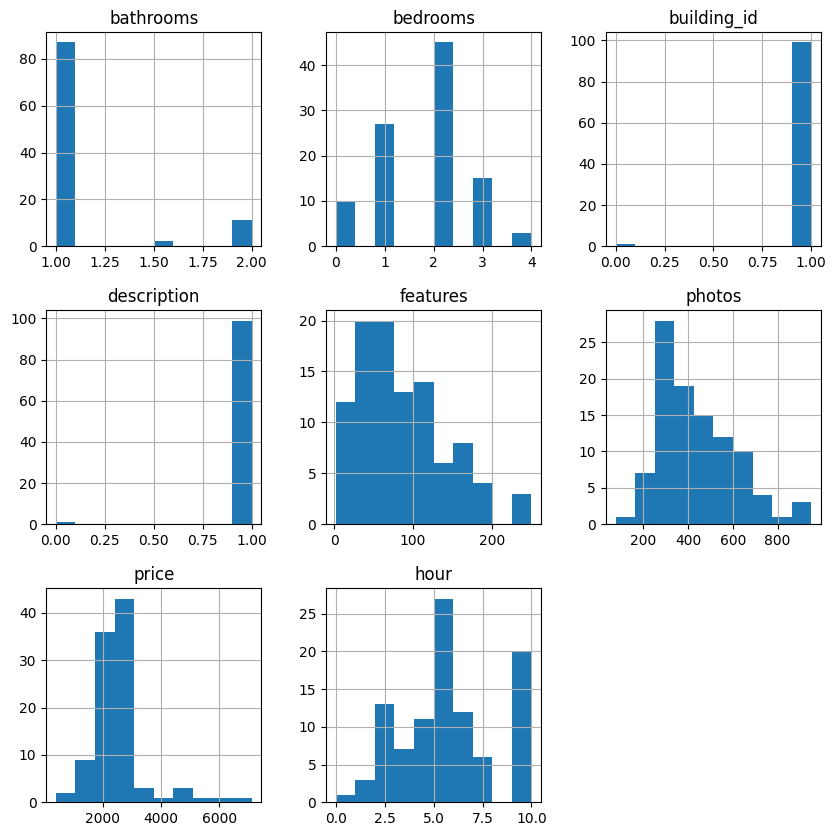

In [153]:
low[col].sample(100).hist(figsize=(10,10))

Верно предсказанная метка

array([[<AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'building_id'}>],
       [<AxesSubplot: title={'center': 'description'}>,
        <AxesSubplot: title={'center': 'features'}>,
        <AxesSubplot: title={'center': 'photos'}>],
       [<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'hour'}>, <AxesSubplot: >]],
      dtype=object)

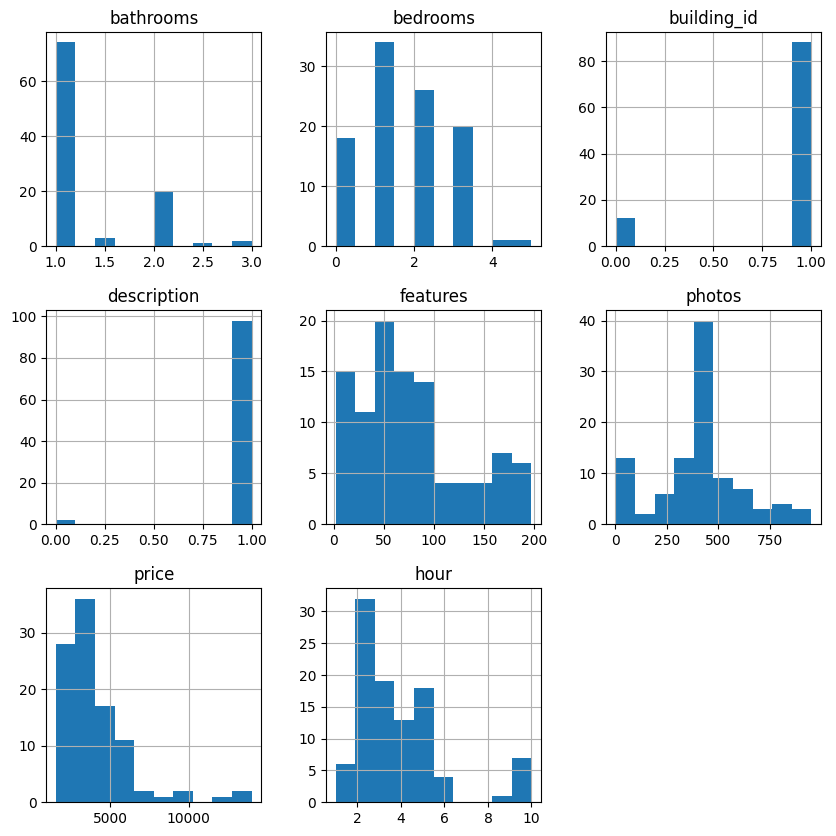

In [152]:
df[col][df.TARGET==1].sample(100).hist(figsize=(10,10))

Есть небольшие различия распределения в некоторых признаках: 

bedrooms - в верно предсказанной метке преобладает кол-во спален 2

building_id - в верно предсказанной метке есть у всех примеров

price - в верно предсказанной метке немного выше

**выделим 2 датафрейма по 100 примеров в каждом: первый где модель предсказала 2, а должна была 1. Второй-где модель верно предсказала метку 2**

In [140]:
medium = err[(err.TARGET==2) & (err.Pred==1)]

Неверно предсказанная метка

array([[<AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'building_id'}>],
       [<AxesSubplot: title={'center': 'description'}>,
        <AxesSubplot: title={'center': 'features'}>,
        <AxesSubplot: title={'center': 'photos'}>],
       [<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'hour'}>, <AxesSubplot: >]],
      dtype=object)

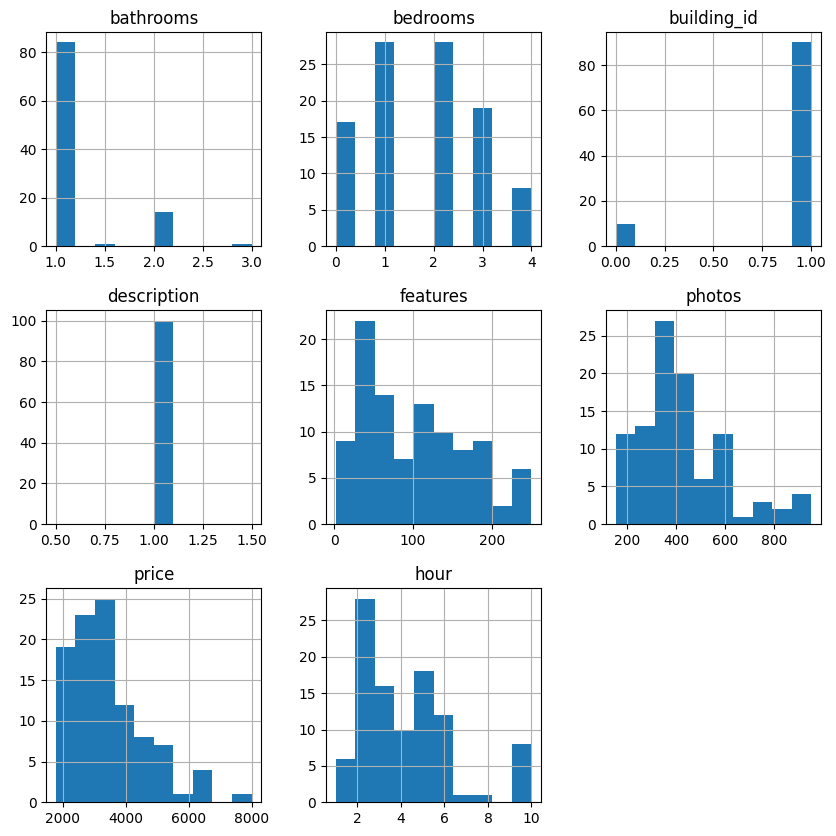

In [155]:
medium[col].sample(100).hist(figsize=(10,10))

Верно предсказанная метка

array([[<AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'building_id'}>],
       [<AxesSubplot: title={'center': 'description'}>,
        <AxesSubplot: title={'center': 'features'}>,
        <AxesSubplot: title={'center': 'photos'}>],
       [<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'hour'}>, <AxesSubplot: >]],
      dtype=object)

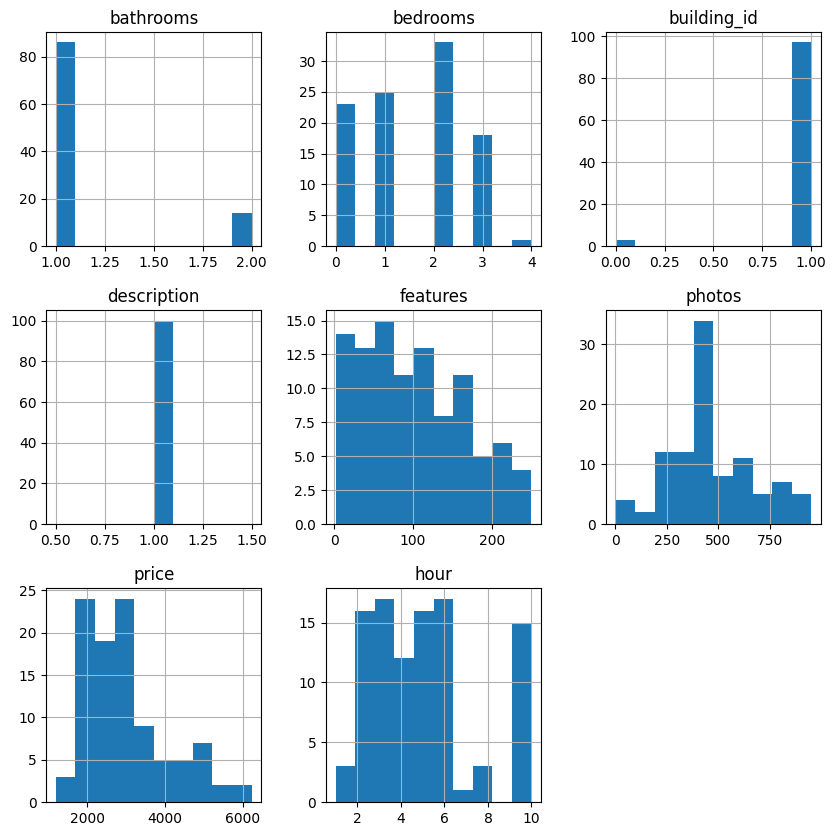

In [154]:
df[col][df.TARGET==2].sample(100).hist(figsize=(10,10))

В целом распределение данных очень схожи, отличия незначительные в некоторых из распределениях

**выделим 2 датафрейма по 100 примеров в каждом: первый где модель предсказала метку 3 неверно. Второй-где модель верно предсказала метку 3**

In [156]:
high = err[(err.TARGET==3)]

array([[<AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'building_id'}>],
       [<AxesSubplot: title={'center': 'description'}>,
        <AxesSubplot: title={'center': 'features'}>,
        <AxesSubplot: title={'center': 'photos'}>],
       [<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'hour'}>, <AxesSubplot: >]],
      dtype=object)

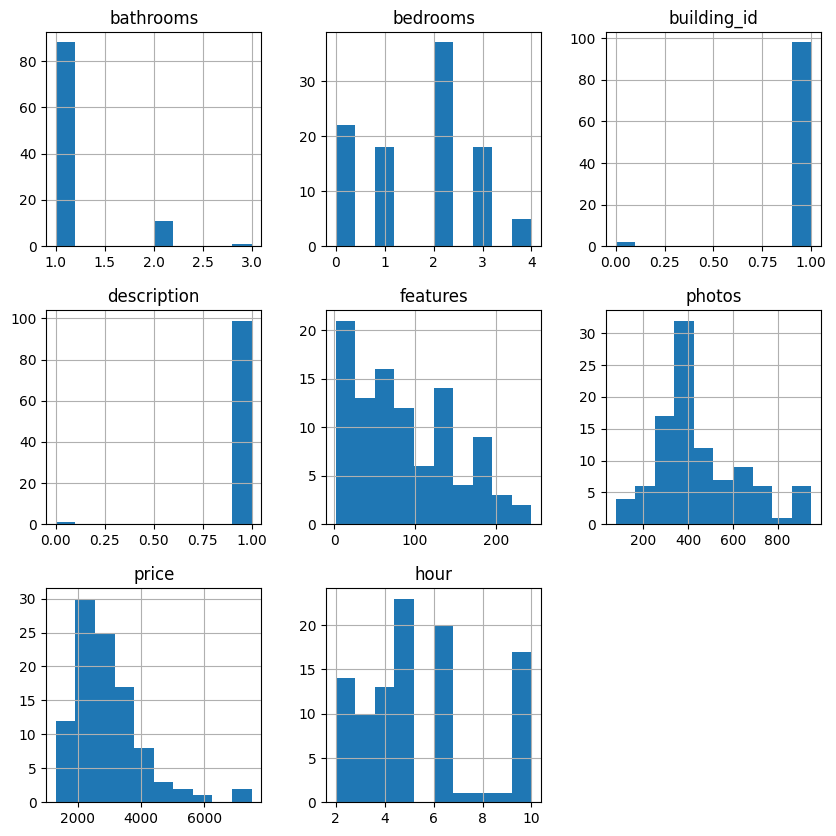

In [157]:
high[col].sample(100).hist(figsize=(10,10))

array([[<AxesSubplot: title={'center': 'bathrooms'}>,
        <AxesSubplot: title={'center': 'bedrooms'}>,
        <AxesSubplot: title={'center': 'building_id'}>],
       [<AxesSubplot: title={'center': 'description'}>,
        <AxesSubplot: title={'center': 'features'}>,
        <AxesSubplot: title={'center': 'photos'}>],
       [<AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'hour'}>, <AxesSubplot: >]],
      dtype=object)

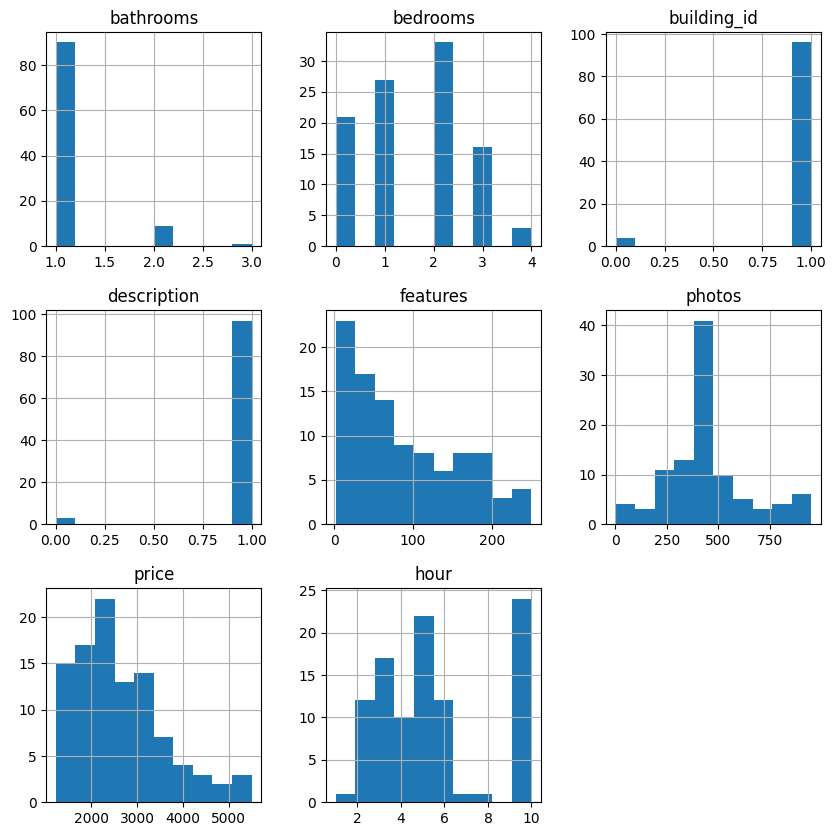

In [160]:
df[col][df.TARGET==3].sample(100).hist(figsize=(10,10))

есть отличие в признаке photos, в верноп редсказанной метке в основном кол-во фото около 400. также в верно предсказанной метке больше дисперсия у признака price 

**Вывод:** метки 1 и 2(low and medium) очень похожи, для 3 (high) не видна какая то отличительная черта, поэтому и метка плохо предсказывается